In [1]:
import pandas as pd
import numpy as np


def load_housing_data():
    return pd.read_csv('housing.csv')

housing = load_housing_data()

In [2]:
# 数字数据处理
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [3]:
# 文本和类别数据处理
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

In [4]:
# 所有列的数据处理流水线
from sklearn.compose import ColumnTransformer

num_attribs = list(housing.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [5]:
# 将数据按收入中位数亦是标签来分训练集和测试集

from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(
    n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [8]:
strat_train_set


numpy.ndarray

In [19]:
# 用训练集训练SVR

from sklearn.svm import SVR


mySVR = SVR(kernel='rbf', C=20)

strat_train_set.drop('median_house_value', axis=1)
X = full_pipeline.fit_transform(strat_train_set)
y = strat_train_set['median_house_value']

mySVR.fit(X, y)


SVR(C=20)

In [20]:
# 将测试集转换后进行测试

strat_test_set.drop('median_house_value', axis=1)
X_test = full_pipeline.fit_transform(strat_test_set)

predict = mySVR.predict(X_test)

In [21]:
strat_test_set.insert(9, 'predict_value', predict)

In [22]:
# 计算均方误差

# from sklearn.metrics import mean_squared_error


# lin_mse = mean_squared_error(y, mySVR.predict(X))
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [64]:
# 交叉验证进行评估

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(mySVR, X, y,
#                          scoring="neg_mean_squared_error", cv=5, verbose=2)
# tree_rmse_scores = np.sqrt(-scores)

# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())

# display_scores(tree_rmse_scores)

# 上下浮动2597

[CV] END .................................................... total time=  10.3s
[CV] END .................................................... total time=  10.4s
[CV] END .................................................... total time=  10.3s
[CV] END .................................................... total time=  10.3s
[CV] END .................................................... total time=  10.2s
Scores: [106817.58280378 105486.43994606 107261.53927854 107388.91875855
 108102.47897124]
Mean: 107011.39195163148
Standard deviation: 867.0192229195736


In [24]:
# 使用网格搜索

# from sklearn.model_selection import GridSearchCV

# param_grid = {'kernel':['rbf'], 'C':[1,5,10,15,20]}
# svr = SVR()
# grid_search = GridSearchCV(svr, param_grid, cv=5,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True,
#                            n_jobs=-1)
# grid_search.fit(X, y)

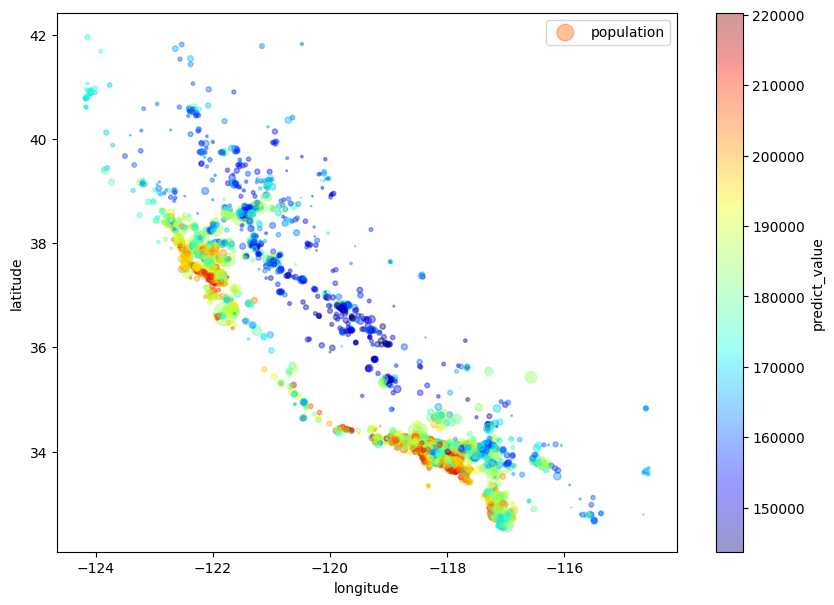

In [58]:
import matplotlib.pyplot as plt

strat_test_set.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.4,
             s=strat_test_set["population"]/100,                    # 点的大小
             label="population",                             #
             figsize=(10, 7),
             c="predict_value",                         # 点的颜色
             # 使用一个名叫jet的预定义颜色表（选项cmap）来进行可视化
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             )
plt.legend()

In [63]:
# 用RandomizedSearchCV替换GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

svr = SVR()
distributions =  {
    'C': [*range(1,10,1)]
}

clf = RandomizedSearchCV(svr, distributions, random_state=42)
clf.fit(X, y)

C:\Users\AKSJF\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
                   random_state=42)